# AI Equity in Education: Addressing Racial Biases in Academic Performance Predictions

## Introduction

In recent years, the application of Artificial Intelligence (AI) in educational settings has seen significant growth, offering the potential to personalize learning experiences, streamline administrative tasks, and enhance educational outcomes. However, the integration of AI technologies in education also brings forth critical ethical considerations, notably regarding fairness and equity. A paramount concern is the risk of perpetuating or even exacerbating existing racial biases through AI systems, which can have far-reaching implications on students' academic and professional futures.

This example notebook aims to shed light on the crucial aspect of AI equity in education by focusing on the challenge of racial biases in academic performance predictions. We generate a synthetic dataset that simulates student academic records, encompassing variables such as race, GPA (Grade Point Average), standardized test scores, and extracurricular involvement. Through this dataset, we explore methodologies for identifying and mitigating racial biases, ensuring that predictive models promote fairness and equity.

## Purpose

The primary objectives of this notebook are to:

- **Generate a Synthetic Dataset**: Create a representative dataset of student academic performance, including sensitive attributes such as race, to illustrate how biases can manifest in educational data.
- **Analyze for Fairness and Bias**: Employ statistical and visual tools to examine the dataset for potential biases, particularly focusing on racial disparities in academic outcomes.
- **Data Preprocessing for Bias Mitigation**: Implement preprocessing techniques aimed at reducing racial biases, thereby preparing the data for fair model training.
- **Model Preparation and Training**: Prepare predictive models while consciously omitting direct racial indicators to assess the feasibility of bias-free academic performance predictions.
- **Hyperparameter Tuning and Model Evaluation**: Fine-tune model parameters and evaluate model performance, ensuring that fairness considerations are integrated into the model evaluation metrics.

## AI Equity in Education

Ensuring AI equity in education means actively working towards models and systems that are inclusive, fair, and do not discriminate based on inherent biases in the data. This notebook contributes to the broader conversation on ethical AI by demonstrating practical steps that data scientists and educators can take to identify and mitigate racial biases in educational data. By fostering awareness and implementing bias-mitigation techniques, we can move closer to realizing the full potential of AI as a force for good in education, enhancing opportunities for all students regardless of their racial or ethnic backgrounds.

**Data Generation:** First, we need to generate a synthetic dataset. We'll create a dataset that includes the following features: race, GPA (Grade Point Average), standardized test scores, and extracurricular involvement score. We'll simulate some biases in this data to illustrate how they can be identified and mitigated later.

In [1]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 1000
race_categories = ['White', 'Black', 'Hispanic', 'Asian', 'Other']

data = {
    'Race': np.random.choice(race_categories, num_samples),
    'GPA': np.random.normal(3.0, 0.5, num_samples).clip(0, 4),  # GPA between 0 and 4
    'TestScore': np.random.normal(100, 15, num_samples).clip(60, 140),  # Standardized test scores
    'Extracurricular': np.random.randint(0, 5, num_samples)  # Extracurricular activity score
}

df = pd.DataFrame(data)
df.head()

,Race,GPA,TestScore,Extracurricular
0,Asian,3.054697,104.481294,0
1,Other,3.362883,88.723134,3
2,Hispanic,3.240505,93.604636,0
3,Other,3.111942,117.226686,1
4,Other,2.604763,101.699056,1


**Fairness/Bias Analysis:** In this section, we'll analyze the dataset for potential biases. We'll start by examining the distribution of GPAs and test scores across different racial groups to identify any significant disparities.

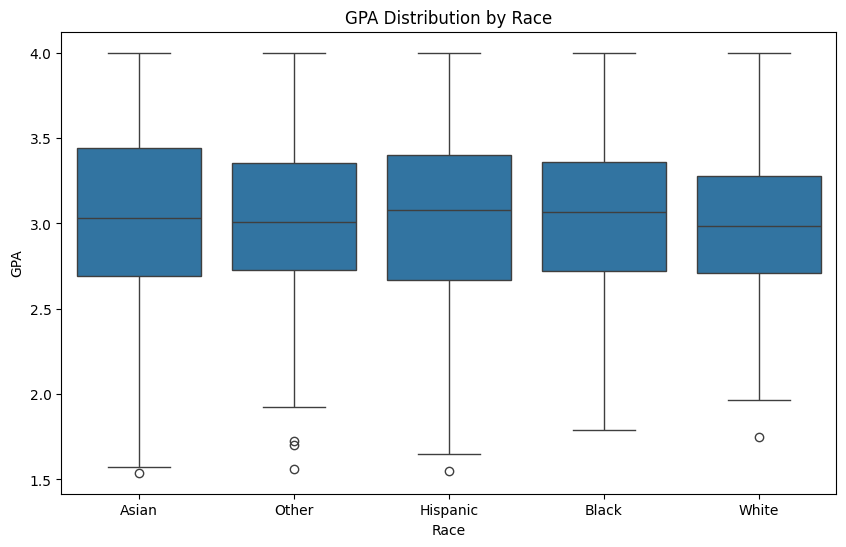

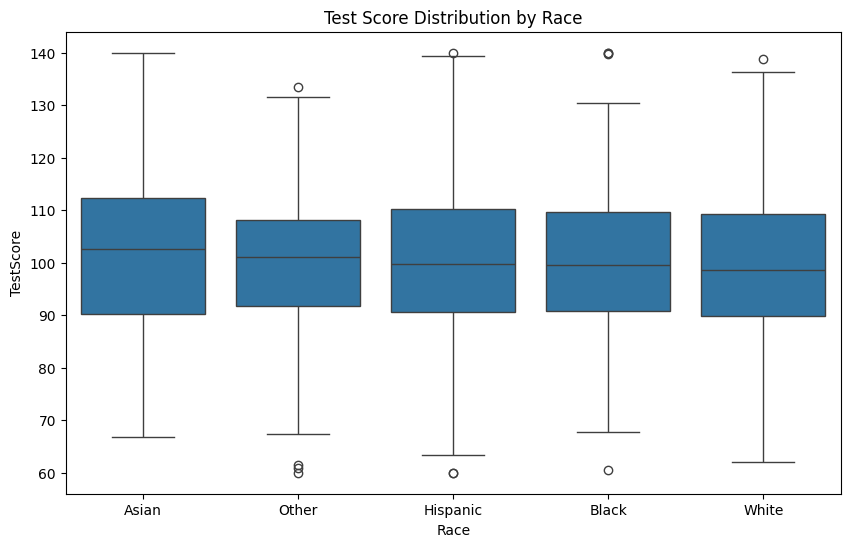

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# GPA distribution by race
plt.figure(figsize=(10, 6))
sns.boxplot(x='Race', y='GPA', data=df)
plt.title('GPA Distribution by Race')
plt.show()

# Test score distribution by race
plt.figure(figsize=(10, 6))
sns.boxplot(x='Race', y='TestScore', data=df)
plt.title('Test Score Distribution by Race')
plt.show()

**Data Preprocessing:** To mitigate bias, we'll apply preprocessing techniques. One common approach is to remove or transform variables that are directly related to sensitive attributes like race. However, since our goal includes studying the impact of race on academic performance while ensuring fairness, we'll instead focus on ensuring our model does not unfairly discriminate based on race.

In [3]:
# Example preprocessing: Standardizing numerical features
from sklearn.preprocessing import StandardScaler

numerical_features = ['GPA', 'TestScore', 'Extracurricular']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.head()

,Race,GPA,TestScore,Extracurricular
0,Asian,0.050400,0.290166,-1.485505
1,Other,0.677764,-0.795550,0.656021
2,Hispanic,0.428642,-0.459221,-1.485505
3,Other,0.166931,1.168307,-0.771663
4,Other,-0.865518,0.098474,-0.771663


**Model Preparation:** For model preparation, we'll encode the race variable and prepare our features and target variable. In this synthetic example, let's predict GPA based on test scores and extracurricular activities, purposely omitting race from our features to focus on unbiased predictors.


In [4]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = df[['TestScore', 'Extracurricular']]
y = df['GPA']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Hyperparameter Tuning and Model Training:** Lastly, we'll choose a model, perform hyperparameter tuning, and train the model. We'll use a simple linear regression model as an example.

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction and evaluation
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.0901952612003596
